# Netflix Data Analysis

Practicing basic data analysis with these questions:

How many new shows/movies in Netflix are released each year?

What are the most common genres?

How many new shows/movies does Netflix add each year?

What is the most popular director in this list, and examine what genre they do the most.


# Data Loading and Cleaning

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
netflix_filepath = "netflix_titles.csv"
netflix_data = pd.read_csv(netflix_filepath, index_col = "show_id")

netflix_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Anaylsis #1

How many new shows/movies in Netflix are released each year? (Starting from the 2000s)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


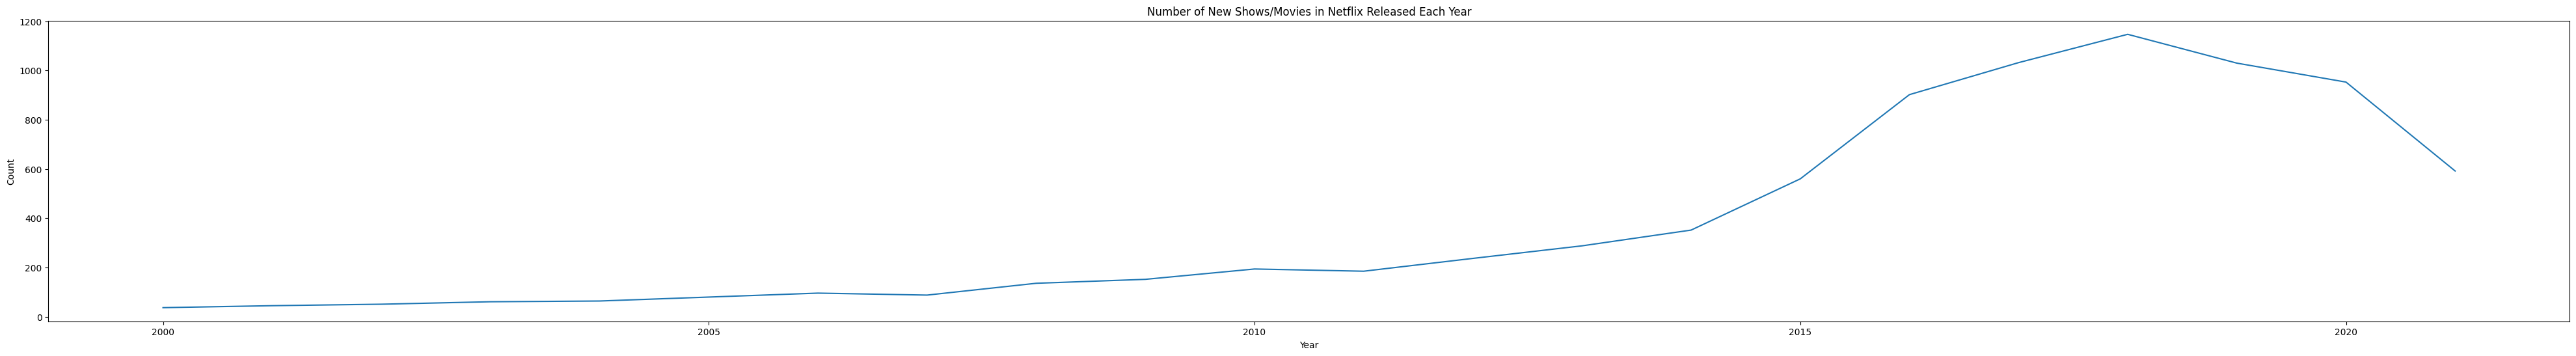

In [3]:
year_counts = netflix_data['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
subset = year_counts[year_counts['release_year'] >= 2000]

plt.figure(figsize=(50,6))
sns.lineplot(x = subset['release_year'], y = subset['count'])
plt.title("Number of New Shows/Movies in Netflix Released Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

Text(0.5, 0, 'Year')

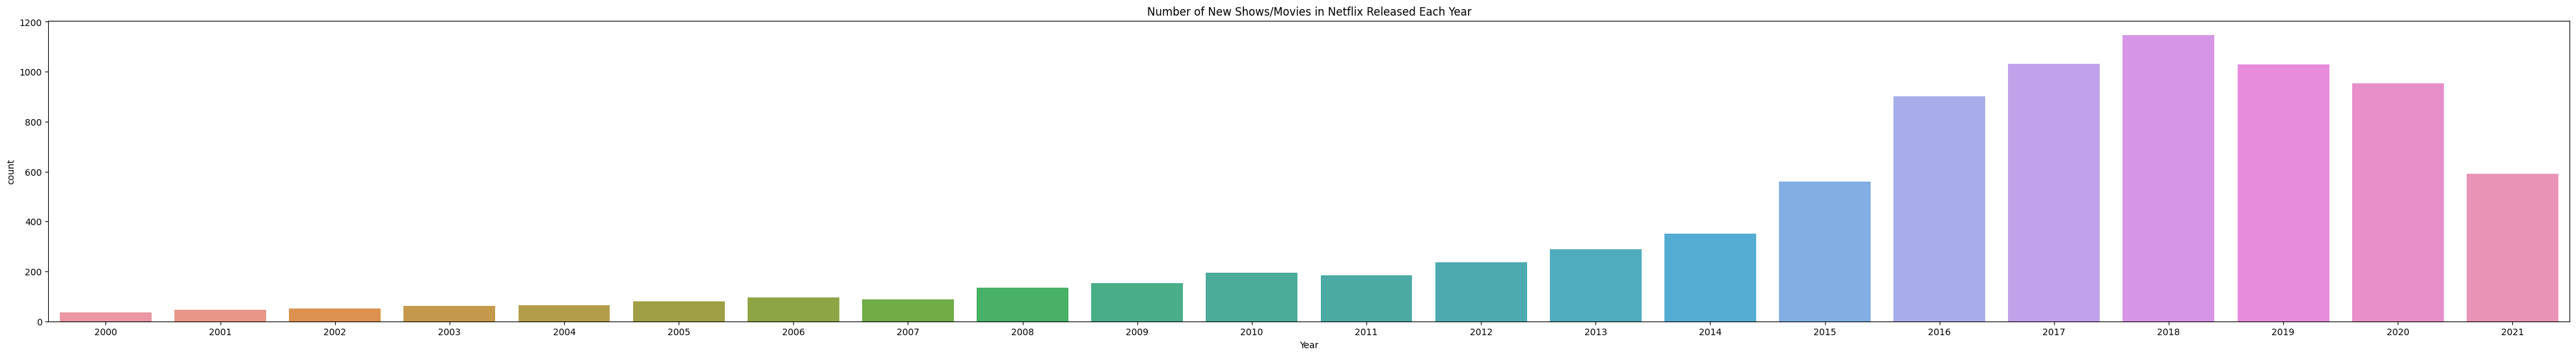

In [4]:
year_counts = netflix_data['release_year'].value_counts().reset_index()
year_counts.columns = ['release_year', 'count']
subset = year_counts[year_counts['release_year'] >= 2000]

plt.figure(figsize = (50,6))
sns.barplot(x = subset['release_year'], y = subset['count'])
plt.title("Number of New Shows/Movies in Netflix Released Each Year")
plt.xlabel("Year")

Based on both graph, we can see a couple of observations:

1. From 2000-2007, there was around 50-150 shows/movies released per year 
2. From 2008-2011, around 200 shows/movies released per year
3. From 2012-2014, around 50 more shows/movies were being released than the previous year, showing an increase
4. From 2015-2018, there was a huge jump compared to the released shows/movies in the previous year by 33%
5. In 2018, it hit the highest number of released shows/movies in a year with 1100
6. From 2019-2021, there is a decrease of released shows/movies by less than 100, with a significant drop in 2021 with 300 less shows than 2020

We can come to these conclusions/hypothesis based on the data:

1. Netflix was not as popular from 2000-2007, as they were not releasing as many shows as the following year
2. There wasn't as much movies/shows being produced around 2000-2007
3. From the significant jump starting from 2015, we can make the hypothesis that there were many more shows/movies being produced during the time, or Netflix gained sudden popularity
5. The significant decrease between 2020-2021 was definitely impacted by Covid-19, as many shows/movies being produced at the time were delayed 

# Analysis #2

What are the most common genres?

Text(0, 0.5, 'Genre')

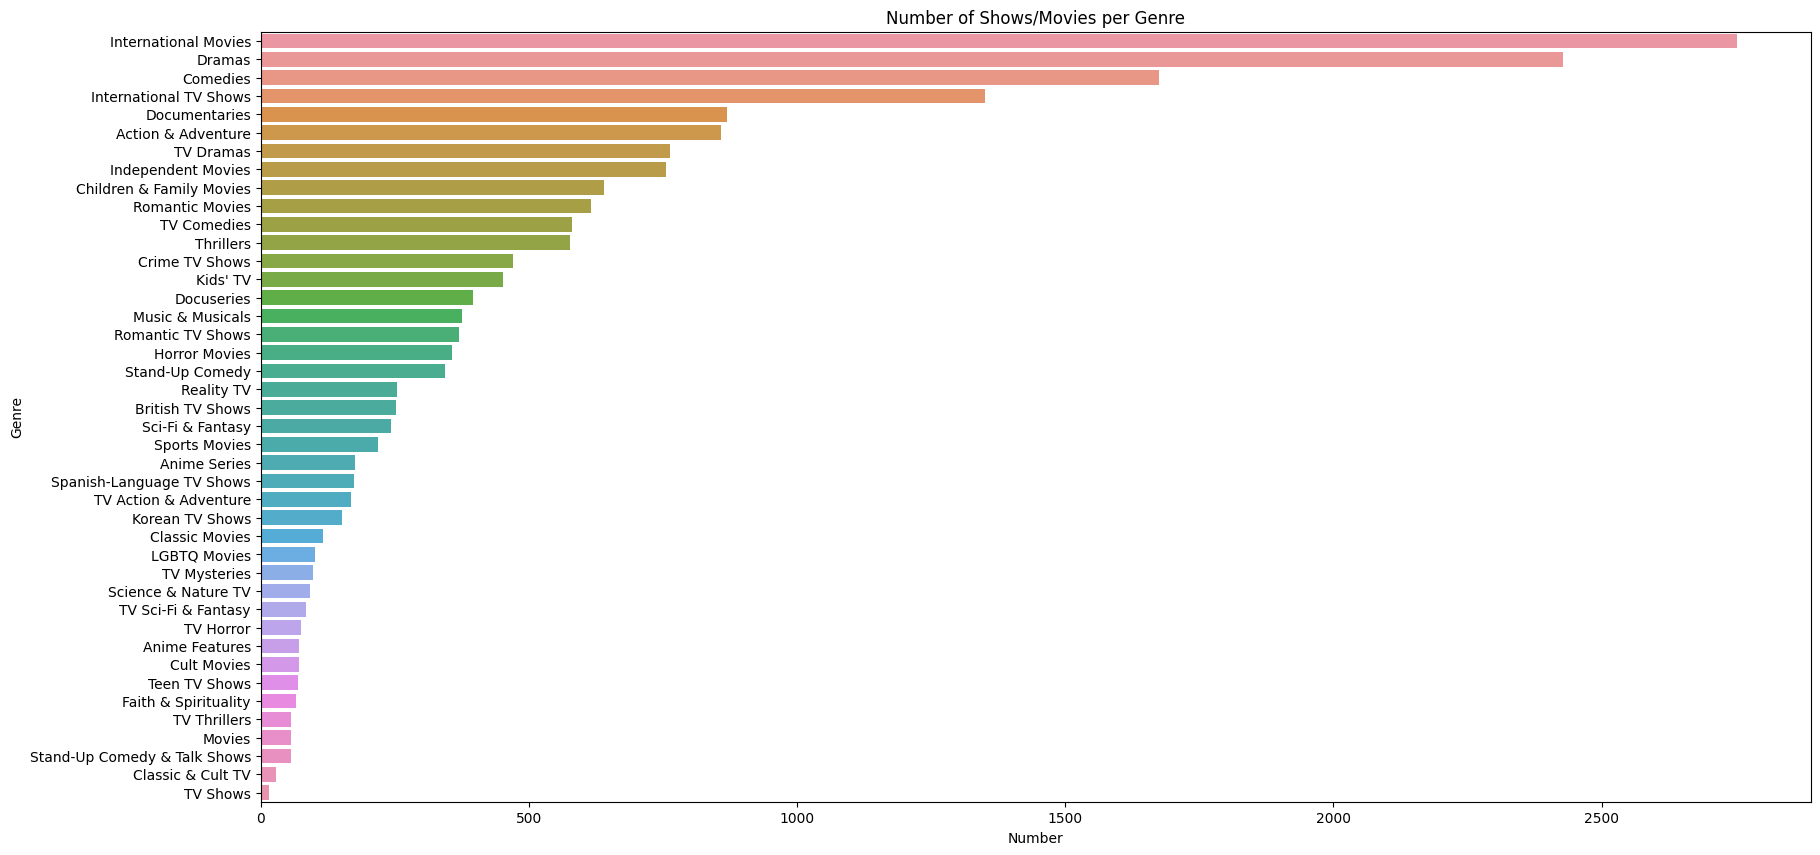

In [5]:
netflix_data['genres_list'] = netflix_data['listed_in'].str.split(',')
genres_exploded = netflix_data.explode('genres_list')
genre_data = genres_exploded['genres_list'].str.strip().value_counts().reset_index()
genre_data.columns = ['genre', 'count']

plt.figure(figsize = (20,10))
sns.barplot(x = genre_data['count'], y = genre_data['genre'])
plt.title("Number of Shows/Movies per Genre")
plt.xlabel("Number")
plt.ylabel("Genre")

Based on the graph, we can observe a couple of things:

1. The most common genre on Netflix is International Movies, while the least common is TV Shows
2. Some of the more popular genre on Netflix is Dramas, Comedies, Documentries and Action & Adventure
3. Netflix has an equal amount of shows and movies on their platform
4. Shows/Movies for children are also quite popular on Netflix compared to the other genres
5. Fictional shows/movies are more common compared to reality, science, sports, talk shows and music

# Analysis 3

How many new shows/movies does Netflix add each year?


Text(0.5, 0, 'Year')

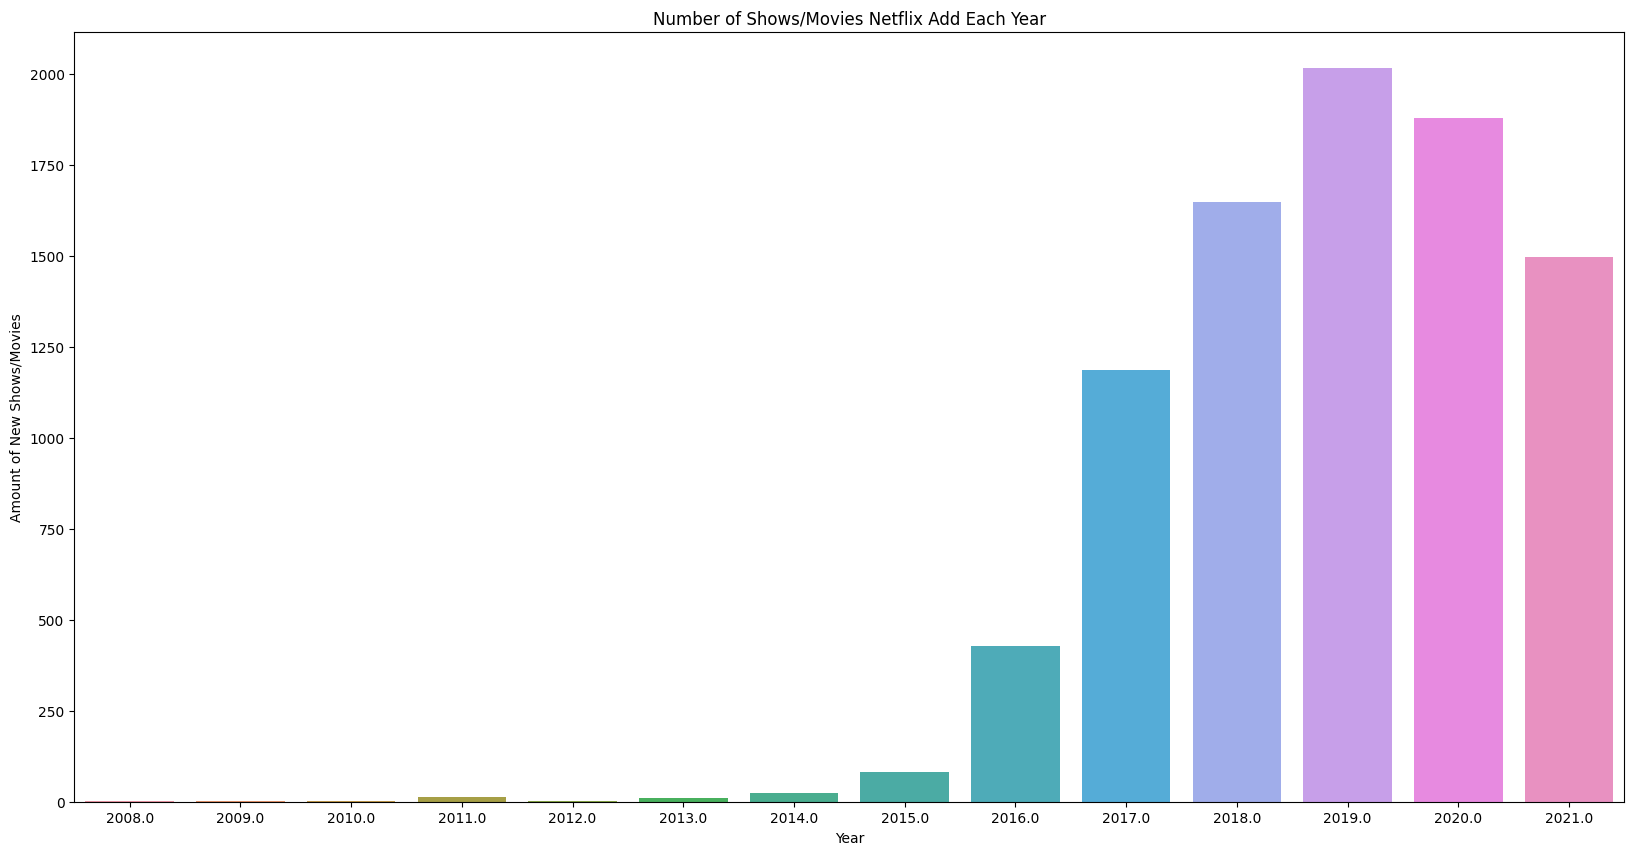

In [6]:
years = pd.to_datetime(netflix_data['date_added'].str.strip(), format='%B %d, %Y').dt.year
release_year = years.value_counts().reset_index()
release_year.columns = ['year', 'count']

plt.figure(figsize = (20,10))
sns.barplot(x = release_year['year'], y = release_year['count'])
plt.title("Number of Shows/Movies Netflix Add Each Year")
plt.ylabel("Amount of New Shows/Movies")
plt.xlabel("Year")

Based on this graph, we can make these observations:

1. From 2008-2014, Netflix was adding less than 50 shows per year, showing that its popularity was minimal
2. From 2015-2019, Netflix gained popularity due to its global expansions and were constantly increasing the amount of new shows/movies being added to their catalog, as they hit the highest amount of added shows/movies in 2019
3. In 2020-2021, influenced by Covid-19, there was a decrease of shows added as perhaps many productions were delayed
4. Netflix also began producing their own content starting in 2011 which boosted the total amount in their catalog

# Analysis 4

What is the most popular director in this list, and examine what genre they do the most.

Text(0, 0.5, 'Directors')

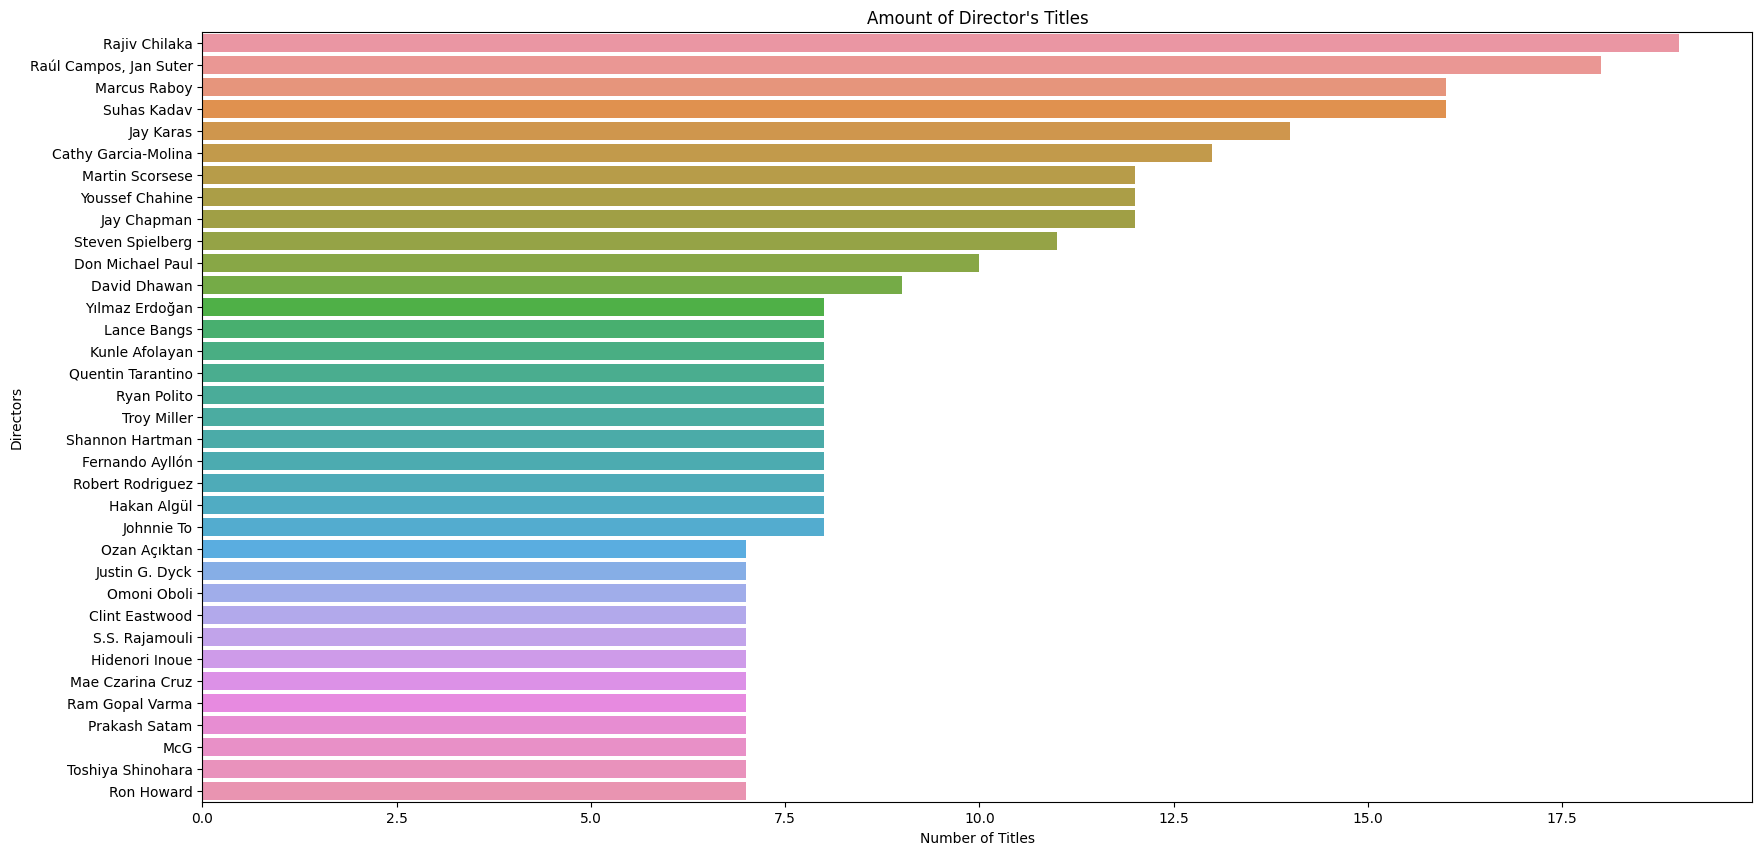

In [7]:
director_counts = netflix_data['director'].value_counts().reset_index()
director_counts.columns = ['director', 'num_titles']
director_counts = director_counts.dropna(subset=['director'])
director_counts = director_counts[director_counts['num_titles'] >= 7]

plt.figure(figsize = (20,10))
sns.barplot(x = director_counts['num_titles'], y = director_counts['director'])
plt.title("Amount of Director's Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Directors")


Based on this graph, we can see that the most popular director in this dataset is Rajiv Chilaka, who directed 19 titles that are streamed on Netflix. Now we need to see what genre does he work with.

Text(0, 0.5, 'Number of Films')

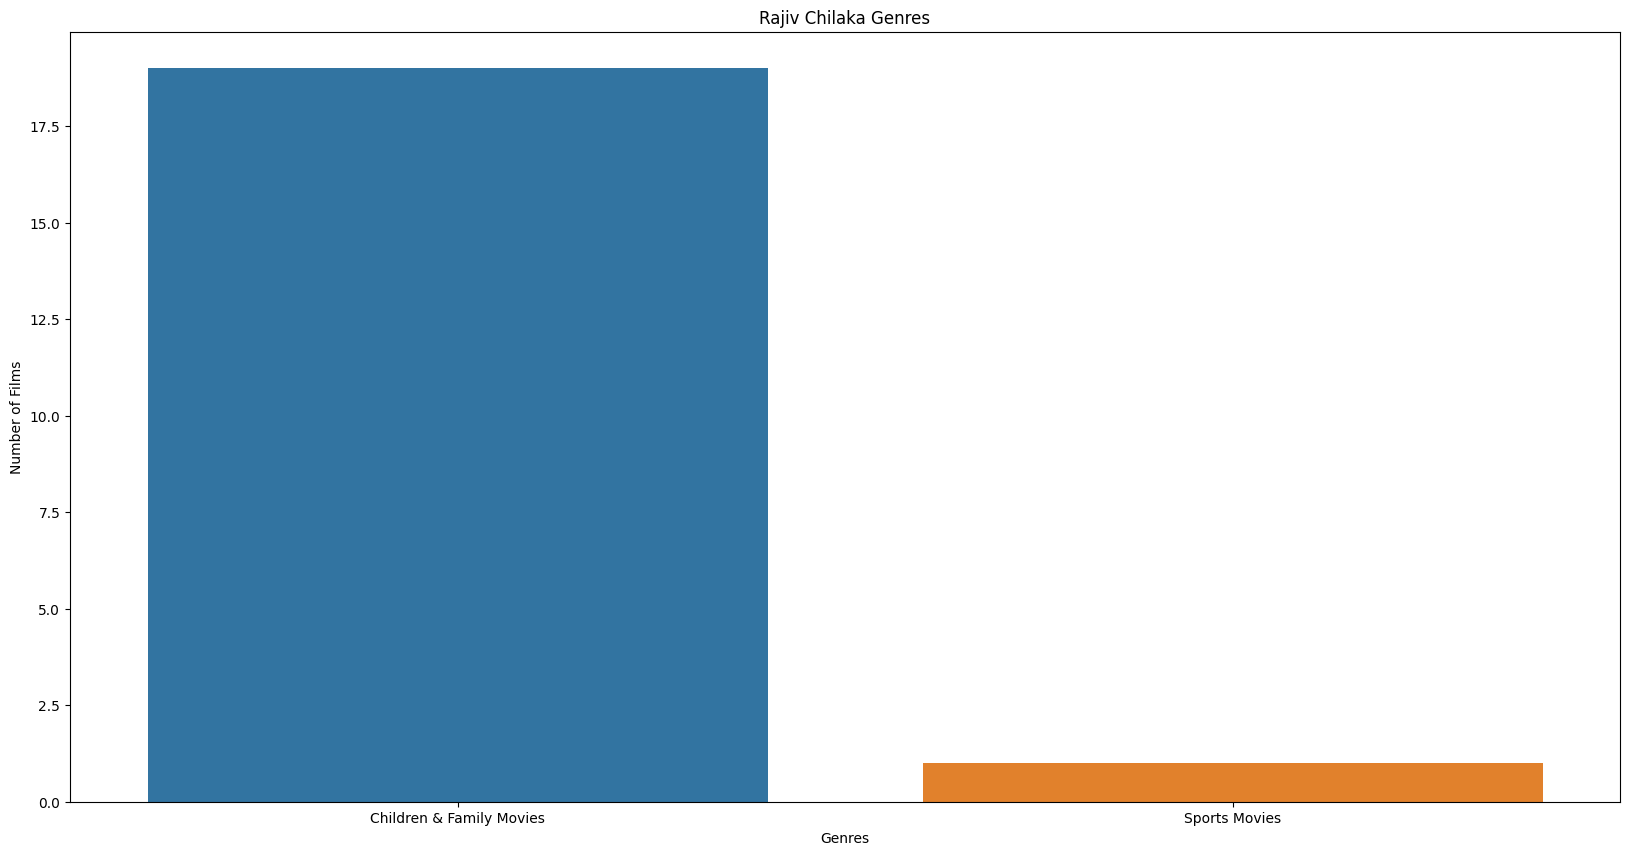

In [8]:
#netflix_data['genres_list'] = netflix_data['listed_in'].str.split(',')
rajiv_titles = netflix_data[netflix_data['director'] == "Rajiv Chilaka"]
rajiv_titles = rajiv_titles.explode('genres_list')
rajiv_titles['genres_list'] = rajiv_titles['genres_list'].str.strip()
genre_counts = rajiv_titles['genres_list'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

plt.figure(figsize = (20,10))
sns.barplot(x = genre_counts['genre'], y = genre_counts['count'])
plt.title("Rajiv Chilaka Genres")
plt.xlabel("Genres")
plt.ylabel("Number of Films")

So we can see that Mr. Chilaka has produced 19 Children & Family Movies and 1 Sports Movie. Therefore to conclude, he directs mostly in Children & Family Movies. 